In [2]:
import torch
import numpy as np
import gymnasium as gym

import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from PIL import Image

os.environ["DISPLAY"] = "99"
rand_seed=123
device = torch.device(f"cuda:{2}" if torch.cuda.is_available() else "cpu")

In [2]:
from gym.envs.classic_control.cartpole import CartPoleEnv

class CustomCartPoleEnv(CartPoleEnv):
    def __init__(self, theta_threshold_deg=12, x_threshold=2.):
        super().__init__()
        # Override the angle threshold (degrees to radians)
        self.theta_threshold_radians = theta_threshold_deg * (np.pi / 180)
        self.x_threshold = x_threshold

In [3]:
env_name = "CartPole-v1"
env = gym.make(env_name, render_mode="rgb_array")

data_length = 5000
traj_length = 5
action_length = traj_length - 1

obs, _ = env.reset(seed=rand_seed)
all_obs = np.zeros((data_length, *obs.shape))
all_acts = np.zeros((int(data_length * action_length / traj_length), env.action_space.n))
gt = np.zeros((data_length//traj_length, *obs.shape))

gt_counter = 0
act_counter = 0

for obs_counter in tqdm(range(data_length)):
    if obs_counter % traj_length == 0:
        gt[gt_counter] = obs.copy()
        gt_counter += 1
    
    all_obs[obs_counter] = obs.copy()
    
    a = env.render()
    a = a[100:-50, 100:-100, :].copy()
    img_resize = Image.fromarray(a).resize((64, 64))
    img_resize.save(f"../data/{env_name.lower()}/cartpole_{obs_counter:03d}.png")
    
    if (obs_counter % traj_length) == act_counter:
        obs, _ = env.reset()
        continue
    
    act = env.action_space.sample()
    all_acts[act_counter] = act
    act_counter += 1
    
    obs, rew, done, _, _ = env.step(act)

  0%|          | 0/5000 [00:00<?, ?it/s]/home/ayush/.local/lib/python3.8/site-packages/gymnasium/envs/classic_control/cartpole.py:214: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
 28%|██▊       | 1418/5000 [00:02<00:06, 530.44it/s]


KeyboardInterrupt: 

In [ ]:
np.savetxt("../data/" + env_name.lower() + "/obs.txt", all_obs)
np.savetxt("../data/" + env_name.lower() + "/gt_at_reset.txt", gt)
np.savetxt("../data/" + env_name.lower() + "/actions.txt", all_acts)

In [25]:
[a for a in os.listdir(os.getcwd() + "/data/" + env_name.lower()) if a.__contains__(".txt")]

['gt_at_reset.txt', 'actions.txt', 'obs.txt']

  0%|          | 0/10 [00:00<?, ?it/s]

hi 1 [array([ 0.01823519, -0.0446179 , -0.02796401, -0.03156282], dtype=float32), array([ 0.01734283, -0.23932791, -0.02859527,  0.25216764], dtype=float32), array([ 0.01255627, -0.43403012, -0.02355192,  0.5356957 ], dtype=float32)]


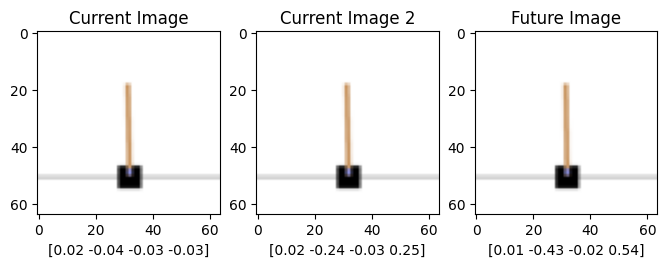

 20%|██        | 2/10 [00:00<00:00, 11.01it/s]

hi 2 [array([ 0.01734283, -0.23932791, -0.02859527,  0.25216764], dtype=float32), array([ 0.01255627, -0.43403012, -0.02355192,  0.5356957 ], dtype=float32), array([ 0.00387567, -0.6288131 , -0.012838  ,  0.8208655 ], dtype=float32)]


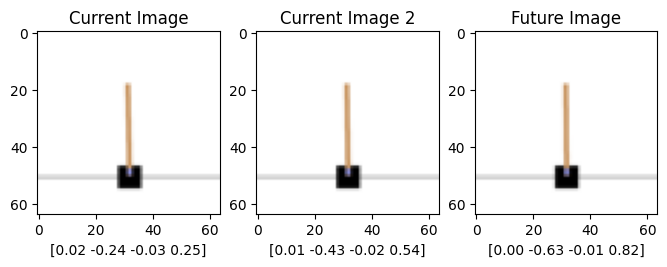

hi 3 [array([ 0.01255627, -0.43403012, -0.02355192,  0.5356957 ], dtype=float32), array([ 0.00387567, -0.6288131 , -0.012838  ,  0.8208655 ], dtype=float32), array([-0.00870059, -0.43351784,  0.00357931,  0.52417254], dtype=float32)]


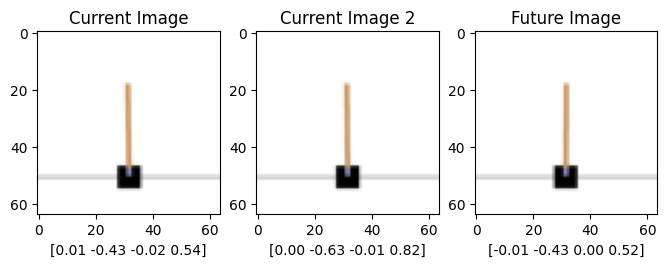

 40%|████      | 4/10 [00:00<00:01,  5.40it/s]

hi 4 [array([ 0.00387567, -0.6288131 , -0.012838  ,  0.8208655 ], dtype=float32), array([-0.00870059, -0.43351784,  0.00357931,  0.52417254], dtype=float32), array([-0.01737095, -0.23844646,  0.01406276,  0.23261963], dtype=float32)]


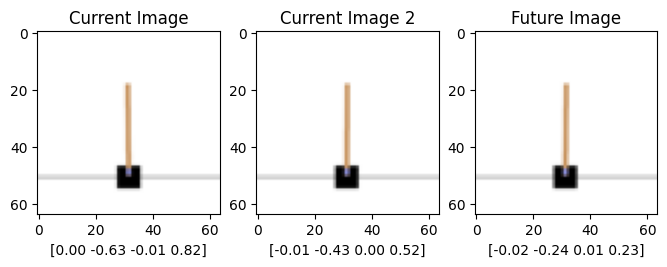

 50%|█████     | 5/10 [00:00<00:00,  5.47it/s]

hi 5 [array([-0.00870059, -0.43351784,  0.00357931,  0.52417254], dtype=float32), array([-0.01737095, -0.23844646,  0.01406276,  0.23261963], dtype=float32), array([-0.02213988, -0.43376648,  0.01871515,  0.52970505], dtype=float32)]


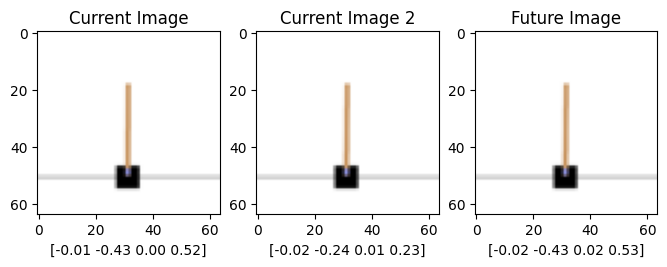

 60%|██████    | 6/10 [00:01<00:00,  5.57it/s]

hi 6 [array([-0.01737095, -0.23844646,  0.01406276,  0.23261963], dtype=float32), array([-0.02213988, -0.43376648,  0.01871515,  0.52970505], dtype=float32), array([-0.03081521, -0.62914664,  0.02930925,  0.82822585], dtype=float32)]


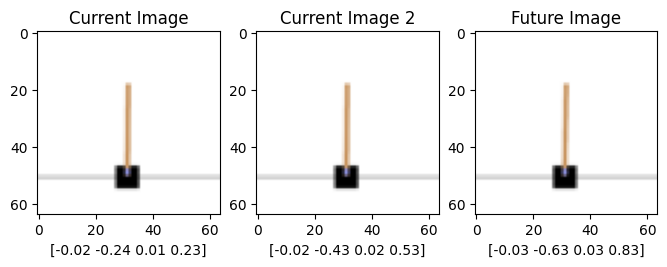

 70%|███████   | 7/10 [00:01<00:00,  5.65it/s]

hi 7 [array([-0.02213988, -0.43376648,  0.01871515,  0.52970505], dtype=float32), array([-0.03081521, -0.62914664,  0.02930925,  0.82822585], dtype=float32), array([-0.04339814, -0.43443742,  0.04587377,  0.54490316], dtype=float32)]


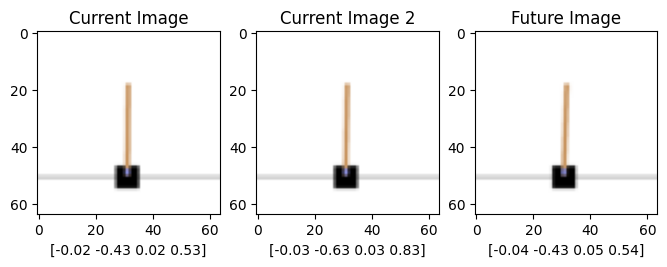

 80%|████████  | 8/10 [00:01<00:00,  5.73it/s]

hi 8 [array([-0.03081521, -0.62914664,  0.02930925,  0.82822585], dtype=float32), array([-0.04339814, -0.43443742,  0.04587377,  0.54490316], dtype=float32), array([-0.05208689, -0.23998909,  0.05677183,  0.26701966], dtype=float32)]


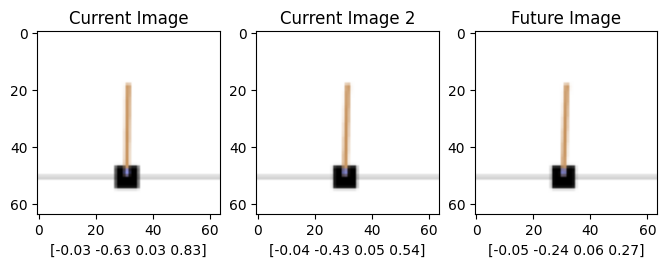

 90%|█████████ | 9/10 [00:01<00:00,  5.72it/s]

hi 9 [array([-0.04339814, -0.43443742,  0.04587377,  0.54490316], dtype=float32), array([-0.05208689, -0.23998909,  0.05677183,  0.26701966], dtype=float32), array([-0.05688667, -0.4358734 ,  0.06211223,  0.5770547 ], dtype=float32)]


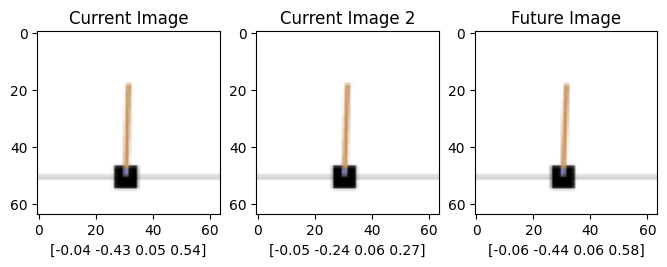

100%|██████████| 10/10 [00:01<00:00,  5.80it/s]

Failures (resets): 0


In [ ]:
env_name = "CartPole-v1-unfixed-10k"
env = gym.make(env_name.split("-unfixed")[0], render_mode="rgb_array")

data_length = 10000
obs, _ = env.reset(seed=rand_seed)

dataset = []  # List of (obs, action, image)
next_imgs = []
obs_arr = []

fail_counter = 0
for obs_counter in tqdm(range(data_length)):
    # if obs_counter + 3 >= data_length:
    #     break
    if len(next_imgs) == 0:
        rendered_img = env.render()
        cropped = rendered_img[100:-50, 100:-100, :]
        img_resize = Image.fromarray(cropped).resize((64, 64)) #.resize((cropped.shape[1] // 8 * 8, cropped.shape[0] // 8 * 8))
        next_imgs.append(np.asarray(img_resize))
        obs_arr.append(obs.copy())

    act = env.action_space.sample()
    next_obs, rew, done, _, _ = env.step(act)
    
    if done:
        fail_counter += 1
        obs, _ = env.reset()
        next_imgs = []
        obs_arr = []
    else:
        if len(next_imgs) == 3:
            obs_arr.pop(0)
            next_imgs.pop(0)
        next_img = env.render()
        cropped = next_img[100:-50, 100:-100, :]
        next_img = Image.fromarray(cropped).resize((64, 64)) #.resize((cropped.shape[1] // 8 * 8, cropped.shape[0] // 8 * 8)).resize((cropped.shape[1] // 8 * 8, cropped.shape[0] // 8 * 8))
        next_imgs.append(np.asarray(next_img))
        obs_arr.append(next_obs.copy())
        
        if len(next_imgs) == 3:
            """fig, ax = plt.subplots(1, 3, figsize=(8, 10))
            ax[0].set_title("Current Image")
            ax[1].set_title("Current Image 2")
            ax[2].set_title("Future Image")
            for i, img in enumerate(next_imgs):
                ax[i].imshow(img)
                ax[i].set_xlabel(np.array2string(obs_arr[i], formatter={'float_kind': lambda x: "%.2f" % x}))
            plt.show()"""
            # Store only valid transitions
            dataset.append({
                'obs': np.asarray(obs_arr).copy(),
                'action': act,
                'image': np.asarray(next_imgs[:-1]).copy(),
                'next_image': next_imgs[-1].copy()
            })
        obs = next_obs

print(f"Failures (resets): {fail_counter}")

In [4]:
# np.savetxt("../data/" + env_name.lower() + "/obs.txt", all_obs)
# np.savetxt("../data/" + env_name.lower() + "/actions.txt", all_acts)

# all_obs = np.array([d['obs'] for d in dataset])
# np.savetxt("../data/" + env_name.lower() + "/obs.txt", all_obs)
all_acts = np.array([d['action'] for d in dataset])
np.savetxt("../data/" + env_name.lower() + "/actions.txt", all_acts)

# make sure to delete old images from directory before saving new ones
for i, d in tqdm(enumerate(dataset), total=len(dataset)):
    for j, img in enumerate(d['image']):
        Image.fromarray(img).save(f"../data/{env_name.lower()}/{i:05d}_{j:05d}_curr.png")
    Image.fromarray(d['next_image']).save(f"../data/{env_name.lower()}/{i:05d}_next.png")

100%|██████████| 9128/9128 [00:03<00:00, 2292.12it/s]


In [5]:
env = CustomCartPoleEnv(theta_threshold_deg=25, x_threshold=1.75)
env.render_mode = "rgb_array"
data_length = 10000
obs, _ = env.reset(seed=rand_seed)
dataset = []  # List of (obs, action, image)
next_imgs = []
obs_arr = []

fail_counter = 0
for obs_counter in tqdm(range(data_length)):
    # if obs_counter + 3 >= data_length:
    #     break
    if len(next_imgs) == 0:
        rendered_img = env.render()
        cropped = rendered_img[100:-50, 100:-100, :]
        img_resize = Image.fromarray(cropped).resize((64, 64)) #.resize((cropped.shape[1] // 8 * 8, cropped.shape[0] // 8 * 8))
        next_imgs.append(np.asarray(img_resize))
        obs_arr.append(obs.copy())

    act = env.action_space.sample()
    next_obs, rew, done, _, _ = env.step(act)
    
    if done:
        fail_counter += 1
        obs, _ = env.reset()
        next_imgs = []
        obs_arr = []
    else:
        if len(next_imgs) == 3:
            obs_arr.pop(0)
            next_imgs.pop(0)
        next_img = env.render()
        cropped = next_img[100:-50, 100:-100, :]
        next_img = Image.fromarray(cropped).resize((64, 64)) #.resize((cropped.shape[1] // 8 * 8, cropped.shape[0] // 8 * 8)).resize((cropped.shape[1] // 8 * 8, cropped.shape[0] // 8 * 8))
        next_imgs.append(np.asarray(next_img))
        obs_arr.append(next_obs.copy())
        
        if len(next_imgs) == 3:
            # Store only valid transitions
            dataset.append({
                'obs': np.asarray(obs_arr).copy(),
                'action': act,
                'image': np.asarray(next_imgs[:-1]).copy(),
                'next_image': next_imgs[-1].copy()
            })
        obs = next_obs

print(f"Failures (resets): {fail_counter}")

100%|██████████| 10000/10000 [00:28<00:00, 350.12it/s]

Failures (resets): 330


In [7]:
env_name = "cartpole-v1-unfixed-lores"
# all_obs = np.array([d['obs'] for d in dataset])
# np.savetxt("../data/" + env_name.lower() + "/obs.txt", all_obs)
all_acts = np.array([d['action'] for d in dataset])
np.savetxt("../data/" + env_name.lower() + "/actions.txt", all_acts)

# make sure to delete old images from directory before saving new ones
for i, d in tqdm(enumerate(dataset), total=len(dataset)):
    for j, img in enumerate(d['image']):
        Image.fromarray(img).save(f"../data/{env_name.lower()}/{i:05d}_{j:05d}_curr.png")
    Image.fromarray(d['next_image']).save(f"../data/{env_name.lower()}/{i:05d}_next.png")

100%|██████████| 9339/9339 [00:04<00:00, 2054.03it/s]


In [8]:
print(all_acts.shape, 
      len([fname for fname in os.listdir(os.path.join(os.getcwd(), os.pardir) + "/data/" + env_name.lower()) if fname.endswith('_next.png')]),
      len([fname for fname in os.listdir(os.path.join(os.getcwd(), os.pardir) + "/data/" + env_name.lower()) if fname.endswith('_curr.png')]))

(9339,) 9339 18678


(250, 400, 3)


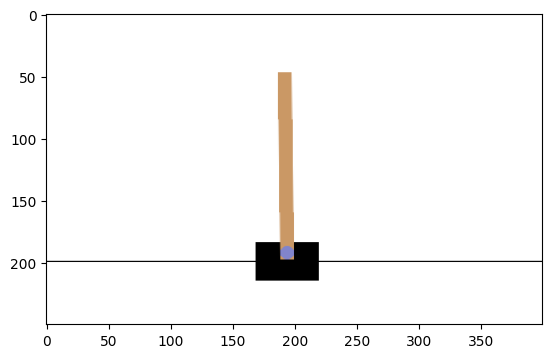

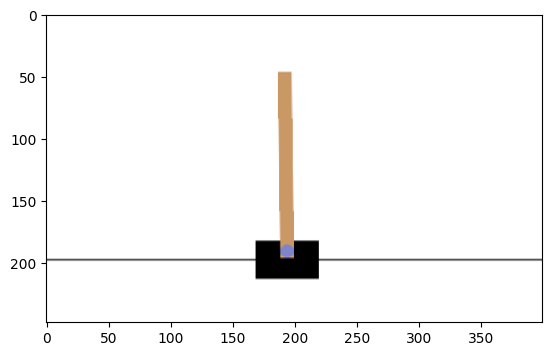

In [31]:
env2 = CustomCartPoleEnv(theta_threshold_deg=25)
env2.render_mode = "rgb_array"
env2.reset()
a = env2.render()
a = a[100:-50, 100:-100, :].copy()
print(a.shape)
img_resize = Image.fromarray(a)
plt.imshow(np.asarray(img_resize))
plt.show()
plt.close()

img_resize = img_resize.resize((a.shape[1] // 8 * 8, a.shape[0] // 8 * 8))
plt.imshow(np.asarray(img_resize))
plt.show()
plt.close()